<a href="https://colab.research.google.com/github/Supratim0406/Skin-Cancer-Detection-System-CNN-TransferLearning/blob/main/Skin_Cancel_Detection_Pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [5]:
# Upload kaggle API token and then proceed with

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
## Download Dataset
!kaggle datasets download -d bhaveshmittal/melanoma-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/bhaveshmittal/melanoma-cancer-dataset
License(s): CC0-1.0
  0% 0.00/79.4M [00:00<?, ?B/s]
100% 79.4M/79.4M [00:00<00:00, 1.72GB/s]


In [7]:
# import libraries
import os
from zipfile import ZipFile

target_directory = '/content/melanoma_data'

# Create the directory if it doesn't exist
os.makedirs(target_directory, exist_ok=True)

# Unzip the dataset
with ZipFile('/content/melanoma-cancer-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall(target_directory)

##Import Libraries

In [40]:
# Basic numerical and scientific computing libraries
import numpy as np
import tensorflow as tf

# Image processing and data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Neural Network Building Blocks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,           # For convolutional layers
    MaxPooling2D,     # For pooling layers
    Dense,            # For fully connected layers
    Flatten,          # To flatten the output
    Dropout,          # For regularization
    BatchNormalization,  # For normalizing layer inputs
    GlobalAveragePooling2D  # Alternative to Flatten
)

# Callbacks for training optimization
from tensorflow.keras.callbacks import (
    EarlyStopping,      # Stops training when model stops improving
    ReduceLROnPlateau   # Reduces learning rate when metrics plateau
)

from tensorflow.keras.regularizers import l2

# Evaluation and Visualization tools
from sklearn.metrics import (
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [41]:
## Dataset Directories
BASE_DIR = "/content/melanoma_data"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
TEST_DIR = os.path.join(BASE_DIR, "test")

In [42]:
## Total images for Benign & Malignant
benign=len(os.listdir(TRAIN_DIR+'/'+'Benign')+os.listdir(TEST_DIR+'/'+'Benign'))
maliganat=len(os.listdir(TRAIN_DIR+'/'+'Malignant')+os.listdir(TEST_DIR+'/'+'Malignant'))
print(f"number of images benign: {benign}")
print(f"number of images maliganat: {maliganat}")

number of images benign: 7289
number of images maliganat: 6590


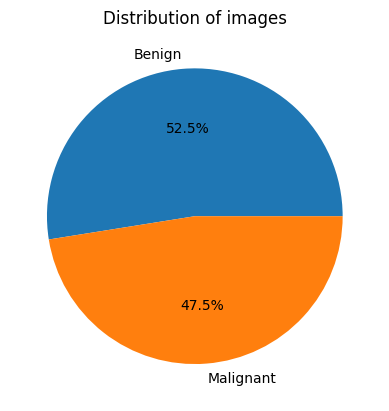

In [43]:
# plot pie chart to show Benign & malignant ratio

plt.pie([benign, maliganat], labels=['Benign', 'Malignant'], autopct='%1.1f%%')
plt.title("Distribution of images")
plt.show()

In [44]:

## Image (Width, Height) and Batch Size
IMG_SIZE = (224, 224) #Optimal Size
BATCH_SIZE=32

# Data Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255, #Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Rescaling only for testing data
test_datagen = ImageDataGenerator(rescale = 1./255)

## Load Training Data
train_generator = train_datagen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = "binary"  #Binary classification
)

## Load Testing Data
test_generator = test_datagen.flow_from_directory(
    directory = TEST_DIR,
    target_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = "binary"  #Binary classification
)

## Print class labels
print("Class Mappings: ",train_generator.class_indices)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Class Mappings:  {'Benign': 0, 'Malignant': 1}


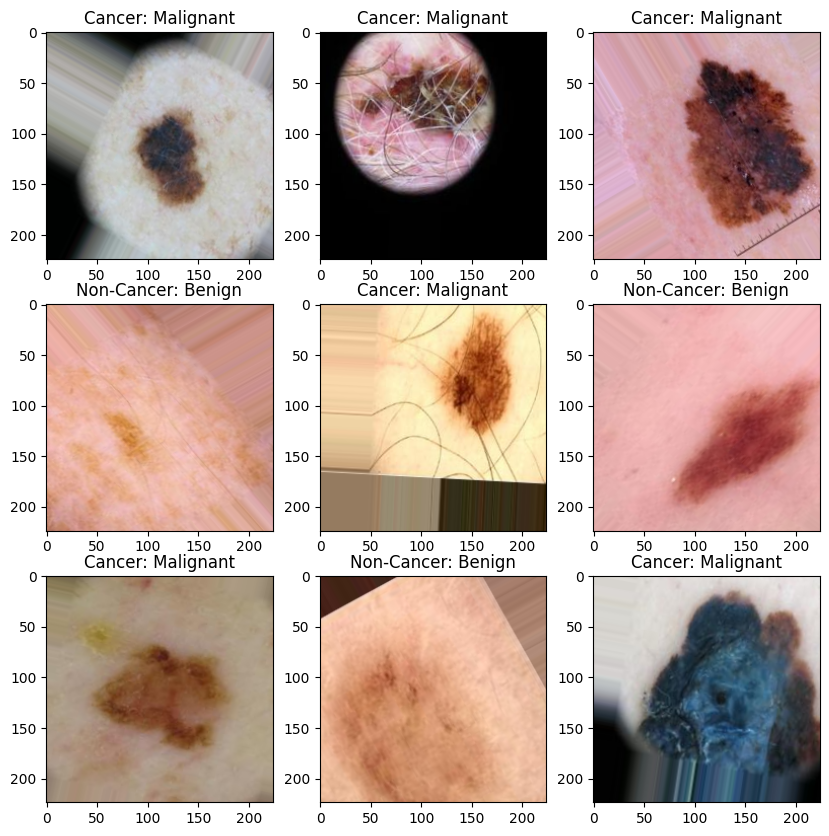

In [45]:
## Create a function to display sample image from the dataset
def plot_images(generator):
    images, labels = next(generator)
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title('Cancer: Malignant' if labels[i]==1 else 'Non-Cancer: Benign')
    plt.show()

## Plot 9 random images from training dataset
plot_images(train_generator)

## Building CNN model

In [46]:
    from tensorflow.keras import models, layers

    input_shape = (224, 224, 3)

    ## In CNN, we have two parts. 1.Feature extractor 2. Classification (Fully Connected Layers)
    model = models.Sequential()

    # 1st Convolution Block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # 2nd Convolution Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    ## 3rd Convolution Block
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    ## Classification - Flattening into 1D array
    model.add(layers.Flatten())

    ## Fully Connected Layer
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5)) ## To prevent overfitting
    model.add(layers.Dense(1, activation='sigmoid'))  ## Output layres for binary classification

    # Compile model
    model.compile(optimizer = 'adam', ## optimizer for faster convergence
                  loss='binary_crossentropy', ## Loss for binary classification
                  metrics = ['accuracy'])

    model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

## Train & Evaluate Model

In [47]:
# EarlyStopping to stop training when the model stops improving

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,  # Stop training after 5 epochs with no improvement
    restore_best_weights=True,
    verbose=1
)

# ReduceLROnPlateau to reduce the learning rate if the model stops improving
lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=3,  # Reduce LR if no improvement after 3 epochs
    min_lr=1e-7,
    verbose=1
)

history = model.fit(
    train_generator,
    ## This determines how many batches of samples from train_generator to use in one epoch.
    ## It's calculated as the total number of samples divided by the batch size.
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=50,  # This model will train for a max of 50 epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 162s 415ms/step - accuracy: 0.6917 - loss: 0.6758 - val_accuracy: 0.8165 - val_loss: 0.4238 - learning_rate: 0.0010
Epoch 2/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7188 - loss: 0.4844 - val_accuracy: 0.8286 - val_loss: 0.4101 - learning_rate: 0.0010
Epoch 3/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 153s 412ms/step - accuracy: 0.8088 - loss: 0.4277 - val_accuracy: 0.8569 - val_loss: 0.3419 - learning_rate: 0.0010
Epoch 4/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9375 - loss: 0.2562 - val_accuracy: 0.8463 - val_loss: 0.3426 - learning_rate: 0.0010
Epoch 5/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 142s 383ms/step - accuracy: 0.8128 - loss: 0.4167 - val_accuracy: 0.8508 - val_loss: 0.3669 - learning_rate: 0.0010
Epoch 6/50
  1/371 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.8750 - loss: 0.3989
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
371/371 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8750 - lo

## Train and Evaluate Model

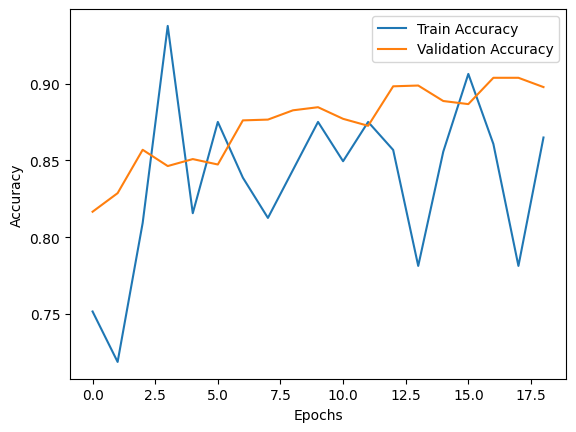

In [48]:
# Plot Training History - Accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

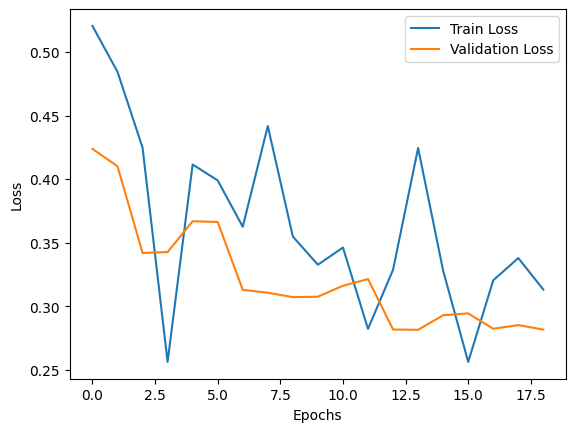

In [49]:
# Plot Training History - Loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [50]:
test_loss,test_acc=model.evaluate(test_generator)
print(test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9118 - loss: 0.2583
0.8989999890327454


## Evaluate Model performance

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1000
           1       0.50      0.50      0.50       984

    accuracy                           0.50      1984
   macro avg       0.50      0.50      0.50      1984
weighted avg       0.50      0.50      0.50      1984



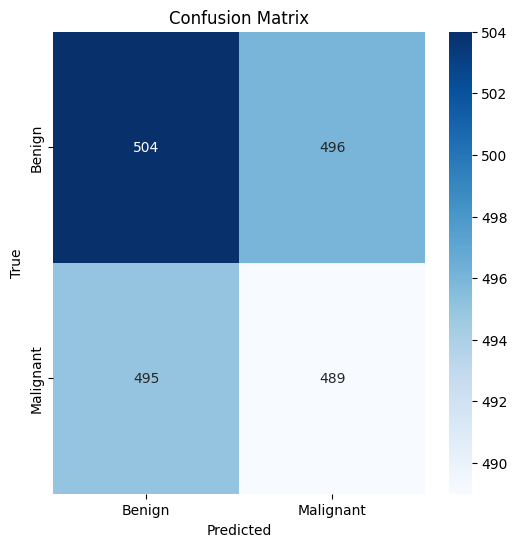

In [51]:
# Predict on the test set
test_pred = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE, verbose=1)

# Convert predictions to binary labels (0 or 1)
test_pred_labels = (test_pred > 0.5).astype("int32")

# Get the true labels
test_true_labels = test_generator.classes[:len(test_pred_labels)]  # Match length to predictions

# Classification report
print("Classification Report:")
print(classification_report(test_true_labels, test_pred_labels))

# Confusion Matrix
cm = confusion_matrix(test_true_labels, test_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [52]:
# Save Model
model.save('skin_cancer_cnn.keras')


In [53]:
test_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


In [54]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, predicted_labels, target_names=list(test_generator.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

      Benign       0.50      0.50      0.50      1000
   Malignant       0.50      0.49      0.50      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



## Predcition system

In [55]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the entire model
model = load_model('/content/skin_cancer_cnn.keras')


def predict_skin_cancer(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))  # Load Image
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make Prediction
    prediction = model.predict(img_array)
    class_label = "Malignant" if prediction > 0.5 else "Benign"

    # Show Image with Prediction
    plt.imshow(img)
    plt.title(f"Predicted: {class_label}")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step


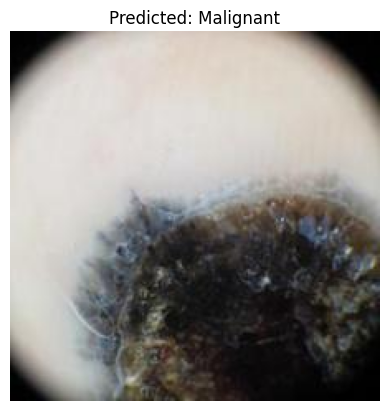

In [56]:
# Test on new image
predict_skin_cancer("/content/melanoma_data/test/Malignant/5606.jpg", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


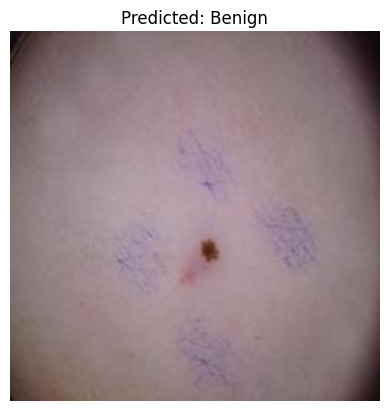

In [57]:
## Test on new image
predict_skin_cancer("/content/melanoma_data/test/Benign/6330.jpg", model)

## Transfer Learning (Pre-trained Model): ResnetV2

1. ResNet50: Uses post-activation (ReLU after batch normalization) - ResNet50: Conv → BN → ReLU

2. ResNet50V2: Uses pre-activation (batch normalization and ReLU before convolution) - ResNet50V2: BN → ReLU → Conv

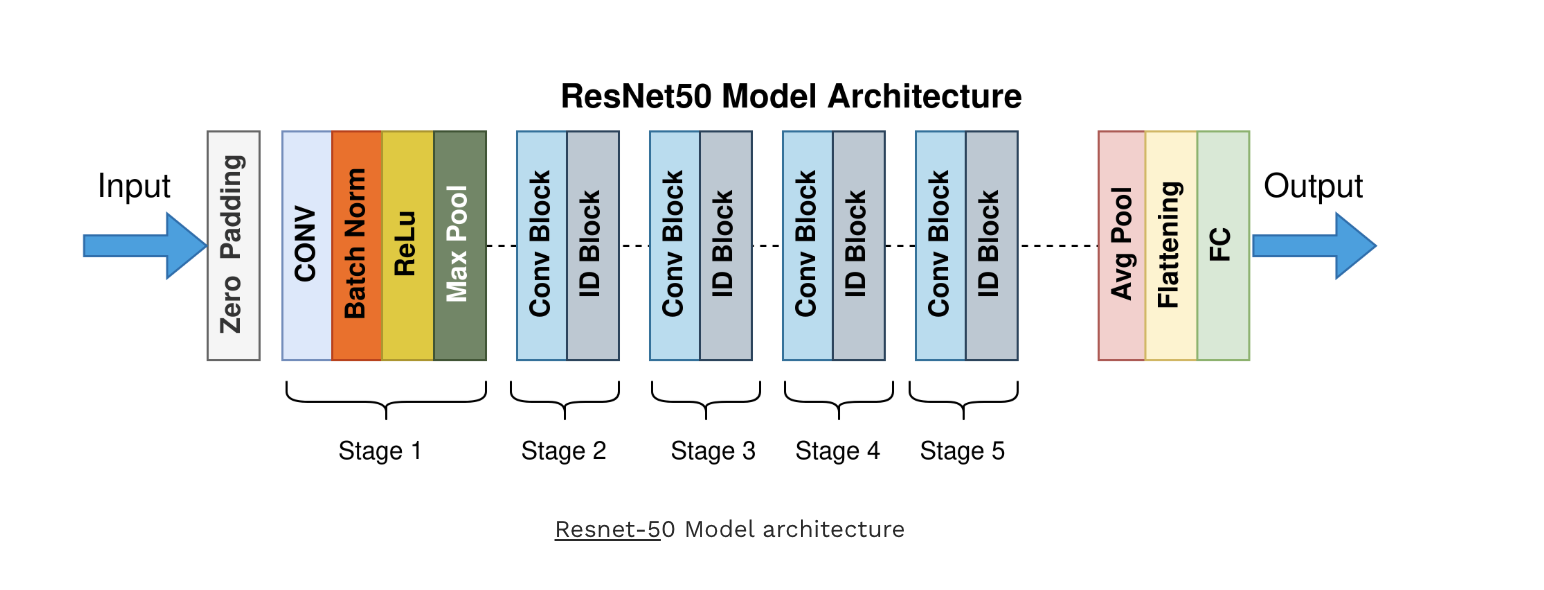

In [65]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [80]:
# Initialize Sequential model
resnet_model = Sequential()

# Add ResNet50V2 base model
base_model = ResNet50V2(
      include_top=False,  # Don't include the final classification layers
      weights='imagenet',  # Use pre-trained weights
      input_shape=(224, 224, 3),  # Input image dimensions
  )

In [81]:
len(base_model.layers)

190

In [82]:
# Freeze the base model layers
base_model.trainable = False

In [83]:
# Add layers
resnet_model.add(base_model)
resnet_model.add(layers.GlobalAveragePooling2D()),
resnet_model.add(layers.Dense(1024, activation='relu'))
resnet_model.add(layers.BatchNormalization())
resnet_model.add(layers.Dropout(0.5))
resnet_model.add(layers.Dense(512, activation='relu'))
resnet_model.add(layers.BatchNormalization())
resnet_model.add(layers.Dropout(0.4))
resnet_model.add(layers.Dense(256, activation='relu'))
resnet_model.add(layers.BatchNormalization())
resnet_model.add(layers.Dropout(0.3))
resnet_model.add(layers.Dense(1, activation='sigmoid'))

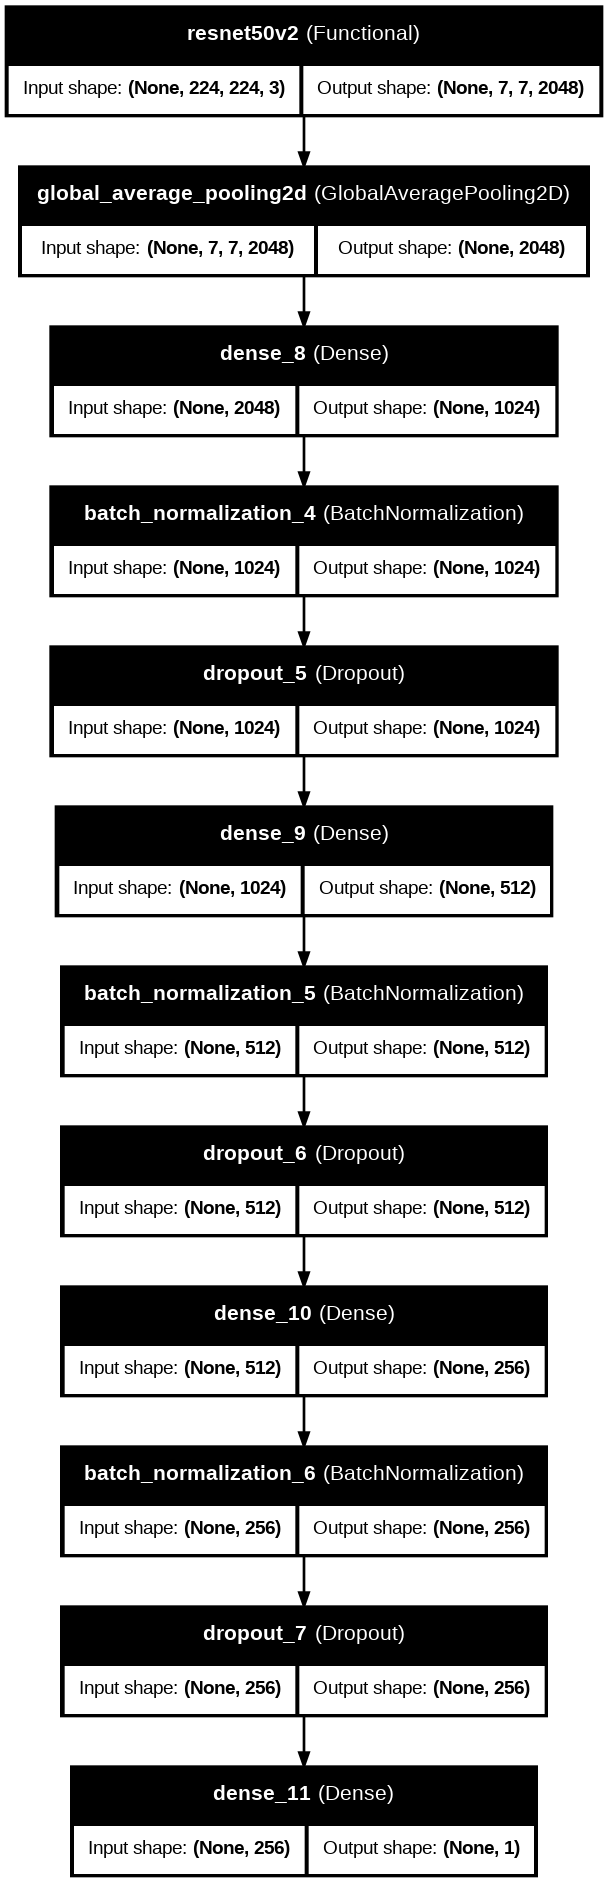

In [84]:
from tensorflow.keras.utils import plot_model

# Basic plot
plot_model(model, to_file='model.png')

# More detailed plot
plot_model(resnet_model,
          to_file='model_detailed.png',
          show_shapes=True,  # Show shape info
          show_layer_names=True,  # Show layer names
          dpi=96)  # Resolution

In [85]:

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

# compile model
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
# Train model
history = resnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 175s 435ms/step - accuracy: 0.7808 - loss: 0.5158 - val_accuracy: 0.8674 - val_loss: 0.3288 - learning_rate: 0.0010
Epoch 2/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7500 - loss: 0.4572 - val_accuracy: 0.8664 - val_loss: 0.3274 - learning_rate: 0.0010
Epoch 3/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 151s 406ms/step - accuracy: 0.8373 - loss: 0.3718 - val_accuracy: 0.8543 - val_loss: 0.3442 - learning_rate: 0.0010
Epoch 4/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7812 - loss: 0.4831 - val_accuracy: 0.8513 - val_loss: 0.3472 - learning_rate: 0.0010
Epoch 5/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 154s 415ms/step - accuracy: 0.8531 - loss: 0.3414 - val_accuracy: 0.8614 - val_loss: 0.3137 - learning_rate: 0.0010
Epoch 6/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9375 - loss: 0.2120 - val_accuracy: 0.8599 - val_loss: 0.3141 - learning_rate: 0.0010
Epoch 7/50
371/371 ━━━━━━━━━━━━━━━━━━━━ 147s 397ms/step - accuracy: 0.859

In [87]:
resnet_loss,resnet_test_acc=resnet_model.evaluate(test_generator)
print(resnet_test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.8910 - loss: 0.2700
0.8995000123977661


62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.47      0.48      1000
           1       0.48      0.50      0.49       984

    accuracy                           0.48      1984
   macro avg       0.48      0.48      0.48      1984
weighted avg       0.48      0.48      0.48      1984



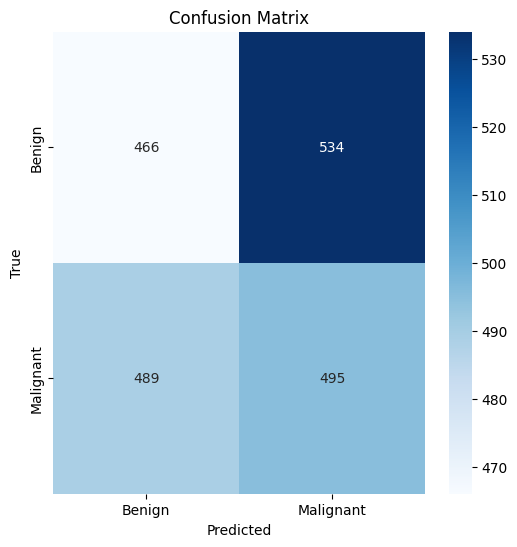

In [88]:
# Predict on the test set
test_pred_rs = resnet_model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE, verbose=1)

# Convert predictions to binary labels (0 or 1)
test_rs_pred_labels = (test_pred_rs > 0.5).astype("int32")

# Get the true labels
test_true_labels = test_generator.classes[:len(test_rs_pred_labels)]  # Match length to predictions

# Classification report
print("Classification Report:")
print(classification_report(test_true_labels, test_rs_pred_labels))

# Confusion Matrix
cm = confusion_matrix(test_true_labels, test_rs_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()